In [159]:
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [160]:
class SOM:

    def __init__(self, height, width, input_dimension):
        self.height = height
        self.width = width
        self.input_dimension = input_dimension
        self.location = [tf.to_float([y,x]) for y in range(height) for x in range(width)]

        self.weight = tf.Variable(tf.random_normal([width * height, input_dimension]))
        self.input = tf.placeholder(tf.float32, [input_dimension])

        best_matching_unit = self.get_bmu()

        self.updated_weight, self.rate_stacked = self.update_neighbour(best_matching_unit)
    
    def get_bmu(self):
        square_difference = tf.square(self.input - self.weight)
        distance = tf.sqrt(tf.reduce_mean(square_difference, axis = 1))

        bmu_index = tf.argmin(distance)
        bmu_location = tf.to_float([tf.div(bmu_index, self.width) , tf.mod(bmu_index, self.width)])

        return bmu_location

    def update_neighbour(self, bmu):
        learning_rate = 0.1 

        sigma = tf.to_float(tf.maximum(self.width, self.height) / 2)

        square_difference = tf.square(self.location - bmu)
        distance = tf.sqrt(tf.reduce_mean(square_difference, axis = 1))

        neighbour_strength = tf.exp(tf.div(tf.negative(tf.square(distance)), 2 * tf.square(sigma)))

        rate = neighbour_strength * learning_rate
        total_node = self.width * self.height
        rate_stacked = tf.stack([tf.tile(tf.slice(rate, [i], [1]), [self.input_dimension]) for i in range(total_node)])

        input_weight_difference = tf.subtract(self.input, self.weight)

        weight_difference = tf.multiply(rate_stacked, input_weight_difference)

        weight_new = tf.add(self.weight, weight_difference)

        return tf.assign(self.weight, weight_new), rate_stacked

    def train(self, dataset, num_of_epoch):
        init = tf.global_variables_initializer()

        with tf.Session() as sess:
            sess.run(init)

            for i in range(num_of_epoch):
                for data in dataset:
                    sess.run(self.updated_weight, feed_dict={ self.input: data })
            
            cluster = [[] for i in range(self.height)]
            location = sess.run(self.location)
            weight = sess.run(self.weight)

            for i, loc in enumerate(location):
                print(i, loc[0])
                cluster[int(loc[0])].append(weight[i])
            
            self.cluster = cluster

In [161]:
df = pd.read_csv("E202-COMP7117-TD01-00 - clustering.csv")
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                     -1.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                        0   
1                     0.0               2                        0   
2                    -1.0               1                        0   
3                     0.0               2                        0   
4                     0.0              10                        1   

   BounceRates  ExitRates  PageValues SpecialDay Month  OperatingSystems  \
0         0.20          3         0.0        LOW   Feb                 1   
1         0.00          3         0.0        LOW   Feb      

In [162]:
dictionary = {
    "special_day_rate" : {
        "HIGH": 2,
        "NORMAL": 1,
        "LOW": 0
    },    
    "visitor_type" : {
    "Returning_Visitor": 2,
    "New_Visitor": 1,
    "Other": 0
    },    
    "weekend" : {
    True: 1,
    False: 0
    }
}

target_1 = df["SpecialDay"]
target_2 = df["VisitorType"]
target_3 = df["Weekend"]
sdr = []
vt = []
wd = []

for i in range(len(df)):
    sdr.append(dictionary["special_day_rate"].get(target_1[i]))
    vt.append(dictionary["visitor_type"].get(target_2[i]))
    wd.append(dictionary["weekend"].get(target_3[i]))

# print(sdr)
# print(vt)
# print(wd)

In [163]:
# X_test = pd.DataFrame()

# X_test["Product Related Duration"] = df["ProductRelated_Duration"]
# X_test["Exit Rates"] = df["ExitRates"]
# X_test["Special Day Rate"] = sdr
# X_test["Visitor Type"] = vt
# X_test["Weekend"] = wd

# print(X_test)

In [186]:
X = np.array((df["ProductRelated_Duration"], df["ExitRates"], sdr, vt, wd))

X = preprocessing.scale(X)

print(X.shape)

(5, 3632)


In [187]:
# pca = PCA()
# components = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = components, columns = ["Principal Component 1", "Principal Component 2", 
#                                                          "Principal Component 3", "Principal Component 4", 
#                                                          "Principal Component 5"])
# print(principalDf)
# print(pca.explained_variance_ratio_)

In [188]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = components, columns = ["Principal Component 1", "Principal Component 2", 
#                                                                    "Principal Component 3"])
# scaler = preprocessing.MinMaxScaler()
# principalComponents = scaler.fit_transform(principalComponents)
print(principalComponents)
print(pca.explained_variance_ratio_)

[[-53.99433144 -40.71873039   0.80954945]
 [ -3.16427903  54.88478319  -5.85277068]
 [ 40.89150637  -6.11269969  35.97405746]
 [-39.51814042  13.91025183  -2.93423097]
 [ 55.78524452 -21.96360494 -27.99660525]]
[0.51066884 0.29653619 0.11685281]


0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 2.0
21 2.0
22 2.0
23 2.0
24 2.0
25 2.0
26 2.0
27 2.0
28 2.0
29 2.0
30 3.0
31 3.0
32 3.0
33 3.0
34 3.0
35 3.0
36 3.0
37 3.0
38 3.0
39 3.0
40 4.0
41 4.0
42 4.0
43 4.0
44 4.0
45 4.0
46 4.0
47 4.0
48 4.0
49 4.0
50 5.0
51 5.0
52 5.0
53 5.0
54 5.0
55 5.0
56 5.0
57 5.0
58 5.0
59 5.0
60 6.0
61 6.0
62 6.0
63 6.0
64 6.0
65 6.0
66 6.0
67 6.0
68 6.0
69 6.0
70 7.0
71 7.0
72 7.0
73 7.0
74 7.0
75 7.0
76 7.0
77 7.0
78 7.0
79 7.0
80 8.0
81 8.0
82 8.0
83 8.0
84 8.0
85 8.0
86 8.0
87 8.0
88 8.0
89 8.0
90 9.0
91 9.0
92 9.0
93 9.0
94 9.0
95 9.0
96 9.0
97 9.0
98 9.0
99 9.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


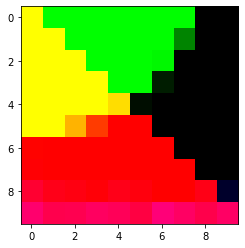

In [189]:
height = 10
width = 10

input_dimension = 3

som = SOM(height, width, input_dimension)
    
som.train(principalComponents, 10)

plt.imshow(som.cluster)
plt.show()